In [23]:
import numpy as np
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import networkx as nx

In [24]:
bio_cont_3 = pandas.read_csv('MAM4-exemples/bio_cont_3.csv')
print(bio_cont_3.shape)

(248, 81)


In [25]:
bio_cont_3.head(5)

,valid,K_atp,K_atp:glyc1,K_atp:nopla,K_atp:noprola,K_atp:phoxa,K_atp:glyc1:phoxa,K_atp:glyc1:glyc2,K_atp:nopla:noprola,K_atp:nopla:phoxa,...,K_nadh:gpdh:krebsn:noaas:phoxn,K_nadh:fermn:krebsn:noaas:phoxn,K_nadh:fermn:gpdh:krebsn:noaas:phoxn,K_krebs,K_krebs:box,K_krebs:pnh,K_krebs:pnh:sat,K_phox,K_phox:pc,Error explanation
0,NaN,0.2,0.0,0.0,0.0,1.1,1.1,1.1,0.0,0.2,...,1.1,1.1,1.1,0.0,0.0,1.1,2.2,0.0,1.1,NaN
1,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
2,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
3,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
4,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN


In [26]:
valeurs_possibles = bio_cont_3[:][0:1].values
print(valeurs_possibles)

[[nan 0.2 0.0 0.0 0.0 1.1 1.1 1.1 0.0 0.2 0.2 0.2 0.2 0.2 2.2 2.2 0.2 0.2
  0.2 1.1 2.2 0.2 2.2 0.2 2.2 0.0 0.0 0.0 0.0 0.0 1.1 0.0 1.1 1.1 1.1 0.0
  0.0 1.1 2.2 2.2 0.0 1.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.1 0.0 0.0 0.0 1.1 0.0 0.0 0.0 1.1 1.1 1.1 0.0 0.0 1.1 1.1 1.1 1.1 1.1
  1.1 1.1 0.0 0.0 1.1 2.2 0.0 1.1 nan]]


In [27]:
bio_cont_3 = bio_cont_3.drop([0],axis=0)

In [28]:
print(bio_cont_3.shape)

(247, 81)


In [29]:
valeurs_possibles[0,0] = 0.0
valeurs_possibles[0,80] = 0.0
print(np.shape(valeurs_possibles))

(1, 81)


In [30]:
def recup_col_importante(vect_val):
    m,n = np.shape(vect_val)
    val_import = []
    for i in range(n):
        a =vect_val[0,i]
        entier = int(a)
        decim = int(round(a%1,2)*10)
        if(entier != decim):
            val_import.append(i)
    return val_import    

In [31]:
v_i = recup_col_importante(valeurs_possibles)

In [32]:
v_i.append(0)

In [33]:
labels = bio_cont_3.columns
labels = labels[v_i]
nv_base = bio_cont_3[labels][:]
nv_base.head(10)

,K_atp,K_atp:nopla:phoxa,K_atp:glyc1:nopla,K_atp:noprola:phoxa,K_atp:glyc1:noprola,K_atp:glyc1:glyc2:nopla,K_atp:glyc1:nopla:phoxa,K_atp:glyc1:glyc2:noprola,K_atp:glyc1:noprola:phoxa,K_atp:glyc1:glyc2:nopla:phoxa,K_atp:glyc1:glyc2:noprola:phoxa,valid
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,OK
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,OK
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,OK
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,OK
5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,OK
6,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,OK
7,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,OK
8,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,OK
9,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,OK
10,0.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,OK


In [34]:
print(nv_base.describe(include='all').loc[['min','max']])

     K_atp  K_atp:nopla:phoxa  K_atp:glyc1:nopla  K_atp:noprola:phoxa  \
min    0.0                1.0                0.0                  1.0   
max    0.0                2.0                2.0                  2.0   

     K_atp:glyc1:noprola  K_atp:glyc1:glyc2:nopla  K_atp:glyc1:nopla:phoxa  \
min                  0.0                      1.0                      1.0   
max                  2.0                      2.0                      2.0   

     K_atp:glyc1:glyc2:noprola  K_atp:glyc1:noprola:phoxa  \
min                        1.0                        1.0   
max                        2.0                        2.0   

     K_atp:glyc1:glyc2:nopla:phoxa  K_atp:glyc1:glyc2:noprola:phoxa valid  
min                            1.0                              1.0   NaN  
max                            2.0                              2.0   NaN  


In [35]:
nv_base = nv_base.drop([labels[0]],axis=1)
nv_base.loc[nv_base["valid"]=="OK", "valid"] = 1
nv_base.loc[nv_base["valid"]=="KO", "valid"] = 0
pandas.to_numeric(nv_base["valid"])

1      1
2      1
3      1
4      1
5      1
      ..
243    1
244    1
245    1
246    1
247    1
Name: valid, Length: 247, dtype: int64

In [36]:
print(nv_base.describe(include='all').loc[['min','max']])

     K_atp:nopla:phoxa  K_atp:glyc1:nopla  K_atp:noprola:phoxa  \
min                1.0                0.0                  1.0   
max                2.0                2.0                  2.0   

     K_atp:glyc1:noprola  K_atp:glyc1:glyc2:nopla  K_atp:glyc1:nopla:phoxa  \
min                  0.0                      1.0                      1.0   
max                  2.0                      2.0                      2.0   

     K_atp:glyc1:glyc2:noprola  K_atp:glyc1:noprola:phoxa  \
min                        1.0                        1.0   
max                        2.0                        2.0   

     K_atp:glyc1:glyc2:nopla:phoxa  K_atp:glyc1:glyc2:noprola:phoxa  valid  
min                            1.0                              1.0    NaN  
max                            2.0                              2.0    NaN  


In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
Z = linkage(nv_base,method='average',metric='jaccard')

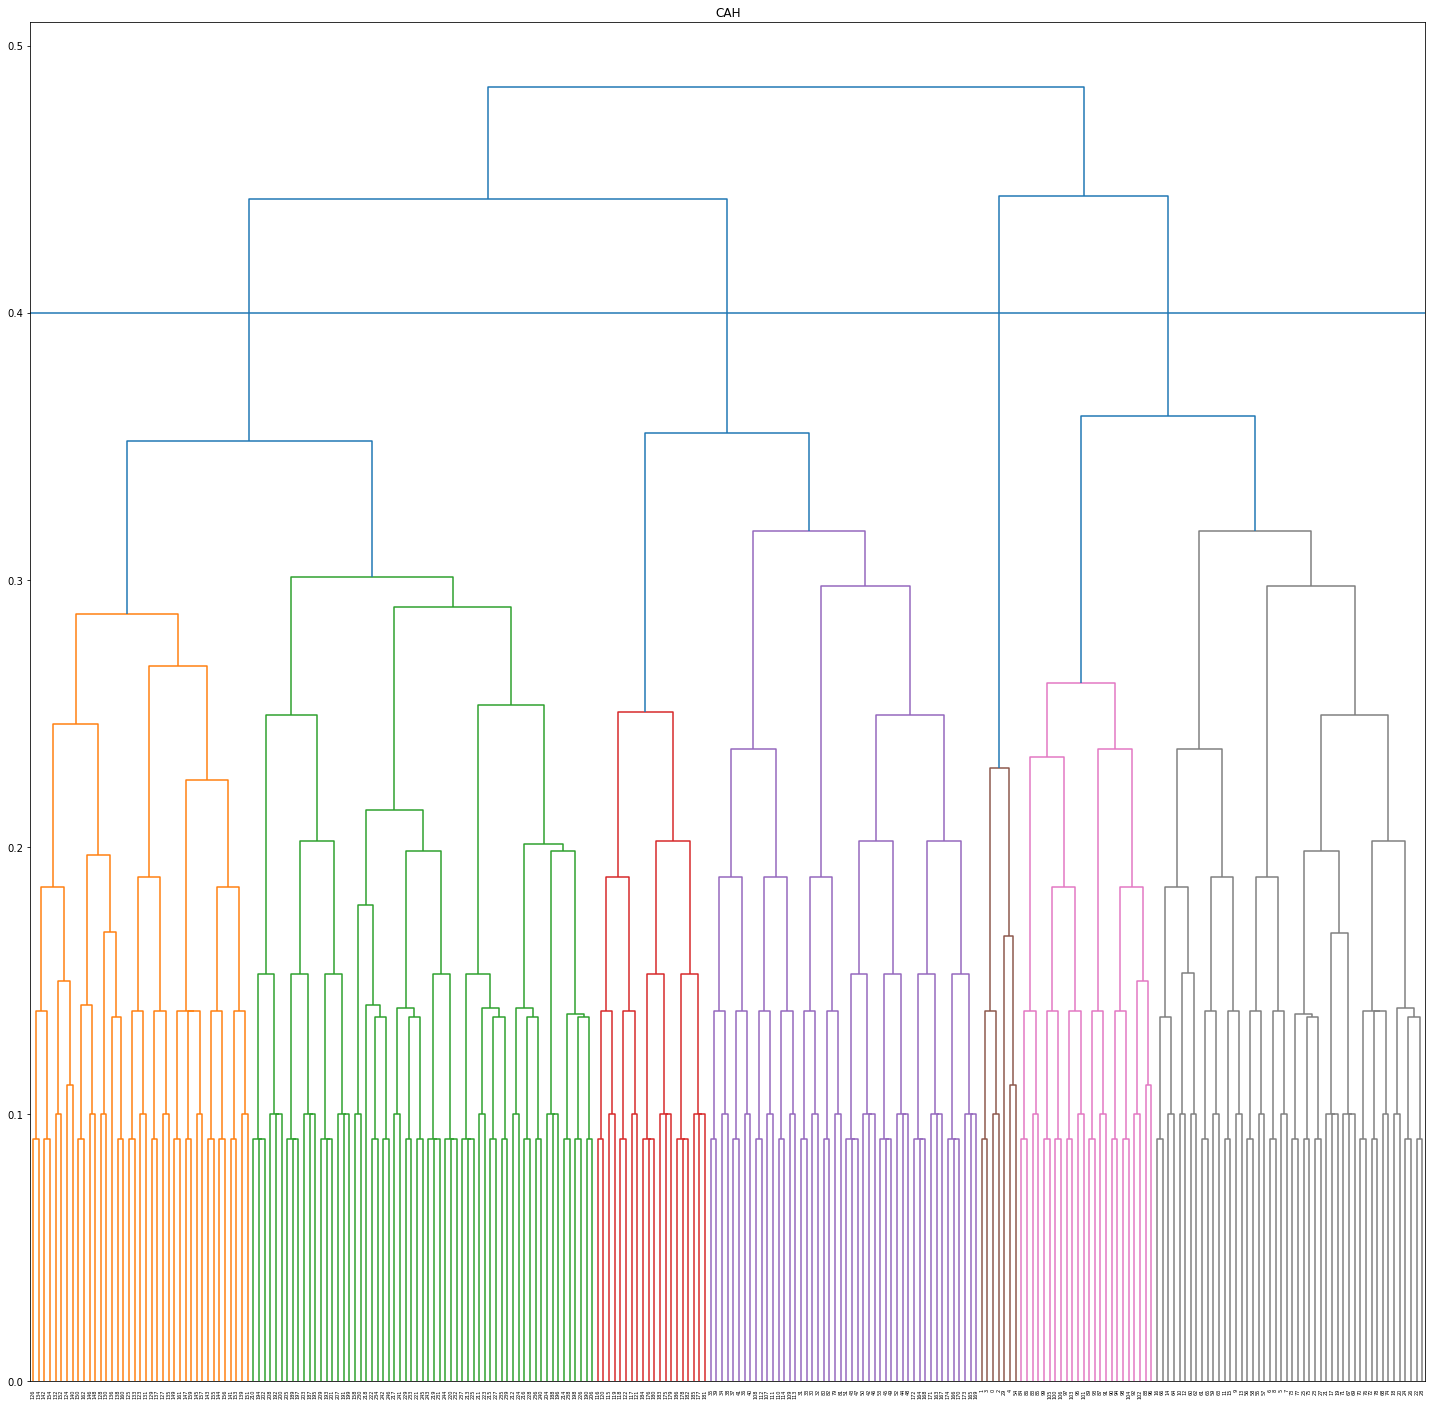

In [76]:
fig = plt.figure(1, figsize=(25, 25))
plt.title("CAH")
dendrogram(Z)
plt.axhline(y=0.4)
plt.show()

D'après ce que j'ai compris pour l'instant on trouve le nombre de cluster optimal est trouveé en fonction de la distance qu'on souhaite entre 1 point et son plus proche voisin, dans notre cas si on prend la distance maximale = 0.4
On trace une droite verticale au niveau de 0.4 et on compte le nombre de branches qu'on intercepte.
Ici on trouve 4 clusters pour une distance maximale de 0.4
On le visualise dans l'autre sens pour mieux voir.

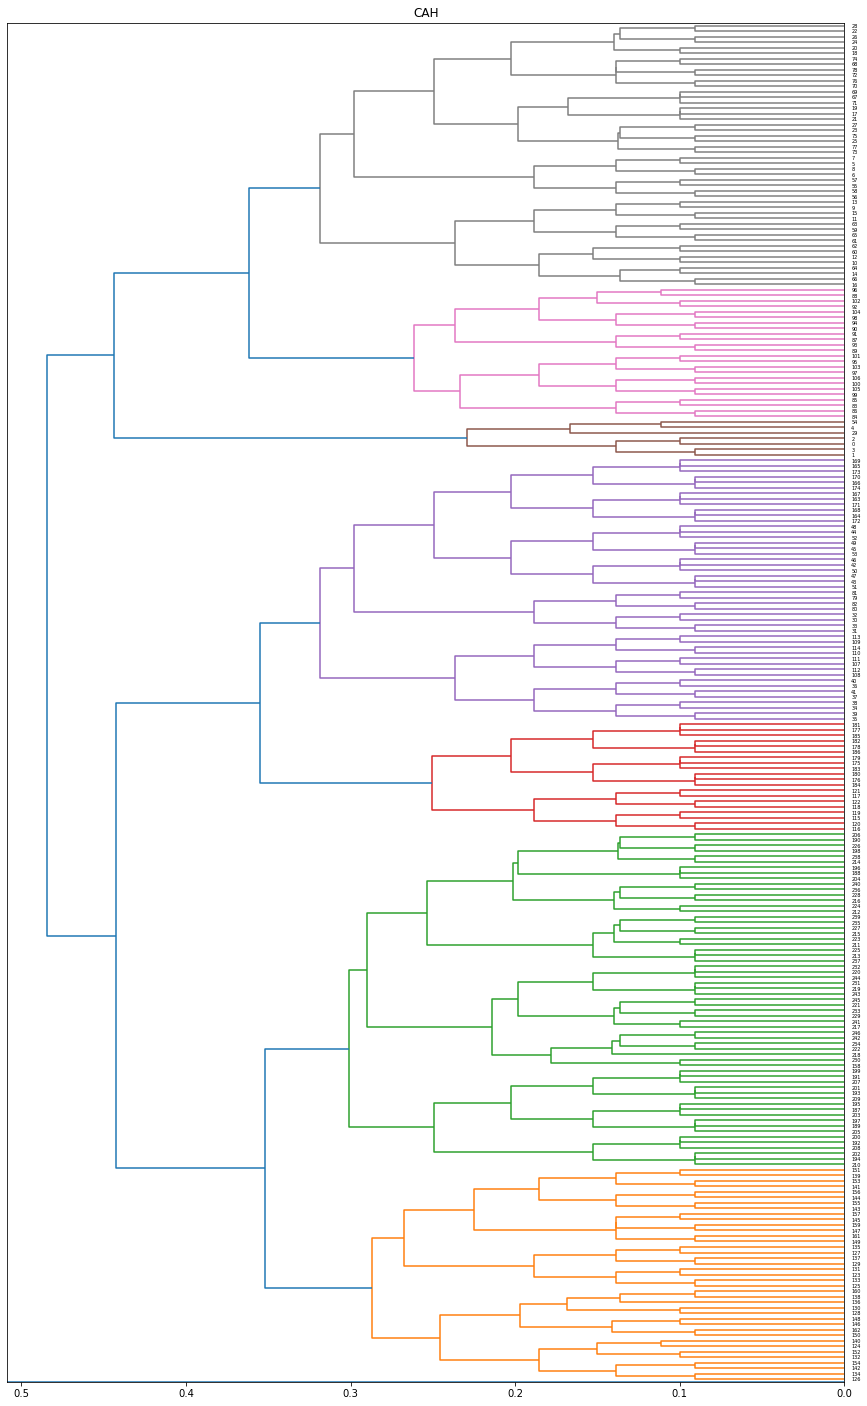

In [77]:
fig = plt.figure(1, figsize=(15, 25))
plt.title("CAH")
dendrogram(Z,orientation='left')
plt.axhline(y=0.4)
plt.show()

Pour l'instant on ne sait pas trop combien il faut de cluster.
Prenons arbitrairement 2.

In [78]:
k = 2

In [80]:
from scipy.cluster.hierarchy import fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [82]:
Hc = AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='average')

In [85]:
Hc.fit(nv_base)

AgglomerativeClustering(affinity='jaccard', linkage='average')

In [89]:
l = Hc.labels_
ind0 = np.where(l==0)
ind1 = np.where(l==1)
print(ind0)
print(ind1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106]),)
(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  79,  80,
        81,  82, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 